---

# **<font color="#6767bf"> Modelación Climática Tropical</font>**
## **<font color="#8282d6"> Atlantic Multidecadal Variability </font>**
### **<font color="#a6a6f1"> Índices y mapas de anomalías GPCC</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Paqueterias
import pandas as pd
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
from scipy import stats

In [7]:
def mapa_MC(data, levels, ccmap, titulo, extend='both', cbarlabel='pr  [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [8]:
# Cargamos el archivo del índice AMV de la NOAA
file_path = 'AMV_NOAA_df.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])  

In [9]:
# Imprimimos los valores positivos
#positivos = amv_JJAS[amv_JJAS['AMV_NOAA'] > 0]
#positivos

In [10]:
df['rolled']=df.AMV_NOAA.rolling(window=120, min_periods=60).mean()

In [11]:
amv_JJAS = df[df['Date'].dt.month.isin([6, 7, 8, 9])]
print(amv_JJAS)

           Date  AMV_NOAA    rolled
5    1854-06-15     -0.18       NaN
6    1854-07-15     -0.07       NaN
7    1854-08-15     -0.20       NaN
8    1854-09-15     -0.04       NaN
17   1855-06-15     -0.06       NaN
...         ...       ...       ...
2024 2022-09-15      0.98  0.592750
2033 2023-06-15      1.27  0.624000
2034 2023-07-15      1.44  0.631583
2035 2023-08-15      1.36  0.638750
2036 2023-09-15      1.42  0.645500

[680 rows x 3 columns]


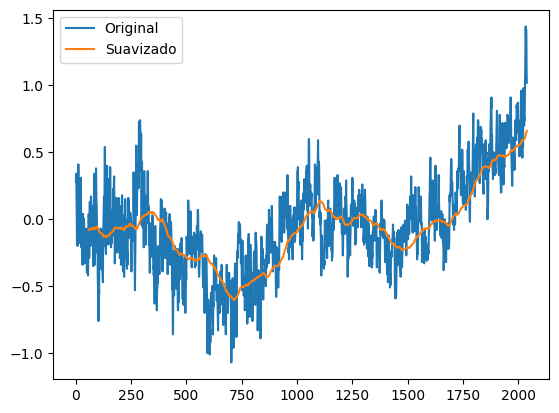

In [12]:
plt.plot(df.AMV_NOAA,label='Original')
plt.plot(df.rolled,label='Suavizado')
plt.legend()

In [13]:
# Seleccionamos los valores negativos
negativos = amv_JJAS[amv_JJAS['AMV_NOAA'] < 0]
negativos

,Date,AMV_NOAA,rolled
5,1854-06-15,-0.18,NaN
6,1854-07-15,-0.07,NaN
7,1854-08-15,-0.20,NaN
8,1854-09-15,-0.04,NaN
17,1855-06-15,-0.06,NaN
...,...,...,...
1687,1994-08-15,-0.22,-0.046417
1688,1994-09-15,-0.18,-0.047083
1709,1996-06-15,-0.03,0.023917
1710,1996-07-15,-0.08,0.024833


In [14]:
# Debemos cargar el .nc con la variable
# Archivo de precipitación GPCC
filename='/home/jovyan/ModClim/datos_actualizados/precip.comb.v2020to2019-v2020monitorafter.total.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr=pr/30.5
pr['units']='mm day-1'
# mascara a xarray para GPCC no GPCP, porque no son iguales.
pr=pr.where(pr<1e10)

In [15]:
lons=pr.lon
lats=pr.lat
pr=pr.loc[dict(lat=lats[lats>0])]
pr=pr.loc[dict(lon=lons[lons>180])]

In [16]:
df_csv=df

In [17]:
# Tenemos que obtener el promedio de los años con AMV tanto positivo
pr=pr.sel(time=slice('1982', '2024'))
pr_jjas=pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
print(pr_jjas)

<xarray.DataArray 'precip' (time: 172, lat: 90, lon: 180)> Size: 11MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan,

In [18]:
def select_matching_time(datetime_index: pd.DatetimeIndex, data_array: xr.DataArray):
    xarray_time = pd.DatetimeIndex(data_array['time'].values)
    xarray_year_month = xarray_time.to_period('M')  # año-mes
    index_year_month = datetime_index.to_period('M')
    print(index_year_month)
    print(xarray_year_month)
    # Encontrar matches 
    matching_times = xarray_time[xarray_year_month.isin(index_year_month)]
    return data_array.sel(time=matching_times)

In [19]:
# Y obtenemos los indices positivos y negativos de las fechas con AMV ya filtradas
positivos_nc = pd.to_datetime(amv_JJAS[amv_JJAS['rolled'] > 0]['Date'].values)
negativos_nc = pd.to_datetime(amv_JJAS[amv_JJAS['rolled'] < 0]['Date'].values)

In [20]:
pr_positivos=select_matching_time(positivos_nc, pr_jjas)

PeriodIndex(['1878-08', '1878-09', '1879-06', '1879-07', '1879-08', '1879-09',
             '1880-06', '1880-07', '1880-08', '1880-09',
             ...
             '2021-08', '2021-09', '2022-06', '2022-07', '2022-08', '2022-09',
             '2023-06', '2023-07', '2023-08', '2023-09'],
            dtype='period[M]', length=221)
PeriodIndex(['1982-06', '1982-07', '1982-08', '1982-09', '1983-06', '1983-07',
             '1983-08', '1983-09', '1984-06', '1984-07',
             ...
             '2022-08', '2022-09', '2023-06', '2023-07', '2023-08', '2023-09',
             '2024-06', '2024-07', '2024-08', '2024-09'],
            dtype='period[M]', length=172)


In [21]:
pr_positivos

<xarray.DataArray 'precip' (time: 112, lat: 90, lon: 180)> Size: 7MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 896B 1996-06-01 1996-07-01 ... 2023-09-01
  * lat      (lat) float32 360B 89.5 88.5 87.5 86.5 85.5 ... 4.5 3.5 2.5 1.5 0.5
  * lon      (lon) float32 720B 180.5 181.5 182.5 183.5 ... 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [22]:
pr_negativos=select_matching_time(negativos_nc, pr_jjas)

PeriodIndex(['1859-06', '1859-07', '1859-08', '1859-09', '1860-06', '1860-07',
             '1860-08', '1860-09', '1861-06', '1861-07',
             ...
             '1993-08', '1993-09', '1994-06', '1994-07', '1994-08', '1994-09',
             '1995-06', '1995-07', '1995-08', '1995-09'],
            dtype='period[M]', length=439)
PeriodIndex(['1982-06', '1982-07', '1982-08', '1982-09', '1983-06', '1983-07',
             '1983-08', '1983-09', '1984-06', '1984-07',
             ...
             '2022-08', '2022-09', '2023-06', '2023-07', '2023-08', '2023-09',
             '2024-06', '2024-07', '2024-08', '2024-09'],
            dtype='period[M]', length=172)


In [23]:
pr_negativos

<xarray.DataArray 'precip' (time: 56, lat: 90, lon: 180)> Size: 4MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 448B 1982-06-01 1982-07-01 ... 1995-09-01
  * lat      (lat) float32 360B 89.5 88.5 87.5 86.5 85.5 ... 4.5 3.5 2.5 1.5 0.5
  * lon      (lon) float32 720B 180.5 181.5 182.5 183.5 ... 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

promedio_positivos = pr_positivos.mean(dim='month')
promedio_negativos = pr_negativos.mean(dim='month')

In [24]:
def funcionsita(da):
    mes_p=da.groupby(da.time.dt.month).mean()
    promedio = mes_p.mean(dim='month')
    return promedio

In [25]:
promedio_positivos = funcionsita(pr_positivos)
promedio_negativos = funcionsita(pr_negativos)

In [26]:
# Seleccionamos los meses JJAS del csv
#df_csv[df_csv['Date'].dt.month.isin([6, 7, 8, 9])]
# Ahora va la climatología JJAS del .nc
promedio_total_JJAS = pr.sel(time=pr['time'].dt.month.isin([6, 7, 8, 9])).mean(dim='time')

In [27]:
# Calculando las anomalías:
anom_positivos = promedio_positivos - promedio_total_JJAS
anom_negativos = promedio_negativos - promedio_total_JJAS
anom_total = promedio_positivos - promedio_negativos

# Guardar las anomalias en netcdfs
#anom_positivos.to_netcdf('anom_positivos_GPCC.nc')
#anom_negativos.to_netcdf('anom_negativos_GPCC.nc')
#anom_total.to_netcdf('anom_total_GPCC_min.nc') #antes decia anom_total_GPCC_actualizado

In [28]:
def calculate_p_values(data1, data2):
    # Definir la función para la prueba t
    def ttest_func(x, y):
        # Eliminar NaNs
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        # Verificar que haya datos sufic.
        if len(x) > 1 and len(y) > 1:
            t_stat, p = stats.ttest_ind(x, y, equal_var=False)
            return p
        else:
            return np.nan

    # Aplicar la función con xarray.apply_ufunc
    p_values = xr.apply_ufunc(
        ttest_func, data1, data2,
        input_core_dims=[['time'], ['time']],  # dimensión de tiempo
        vectorize=True,                        # Vectorizar
        dask='parallelized', 
        join='outer',
        output_dtypes=[float]                  
    )

    return p_values # retorna pvalues

In [29]:
# Calcular los p-values
p_values = calculate_p_values(pr_positivos, pr_negativos)
p_values

<xarray.DataArray 'precip' (lat: 90, lon: 180)> Size: 130kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 360B 89.5 88.5 87.5 86.5 85.5 ... 4.5 3.5 2.5 1.5 0.5
  * lon      (lon) float32 720B 180.5 181.5 182.5 183.5 ... 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [30]:
print(anom_total.shape)
print(p_values.shape)

(90, 180)
(90, 180)


In [31]:
lons=anom_total.lon
lats=anom_total.lat

In [32]:
anom_total

<xarray.DataArray 'precip' (lat: 90, lon: 180)> Size: 65kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B 89.5 88.5 87.5 86.5 85.5 ... 4.5 3.5 2.5 1.5 0.5
  * lon      (lon) float32 720B 180.5 181.5 182.5 183.5 ... 357.5 358.5 359.5
    units    <U8 32B 'mm day-1'

In [33]:
def mapa_MC(data, levels, ccmap, titulo, p_values=None, p_levels=None, hatches=None, extend='both', 
            cbarlabel='pr  [mm día$^{-1}$]', limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    # Agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

    # Hatching 
    if p_values is not None and p_levels is not None and hatches is not None:
        # Aplicar hatching
        nan_mask = np.isnan(p_values)

        masked_p_values = np.ma.masked_where(nan_mask, p_values)

        hatch_mask = (masked_p_values > 0.05)
        hatching = ax.contourf(lons, lats, hatch_mask, levels=[0, 0.05], colors='none', alpha=0.02,
                                hatches=hatches, transform=ccrs.PlateCarree())
    plt.show() 


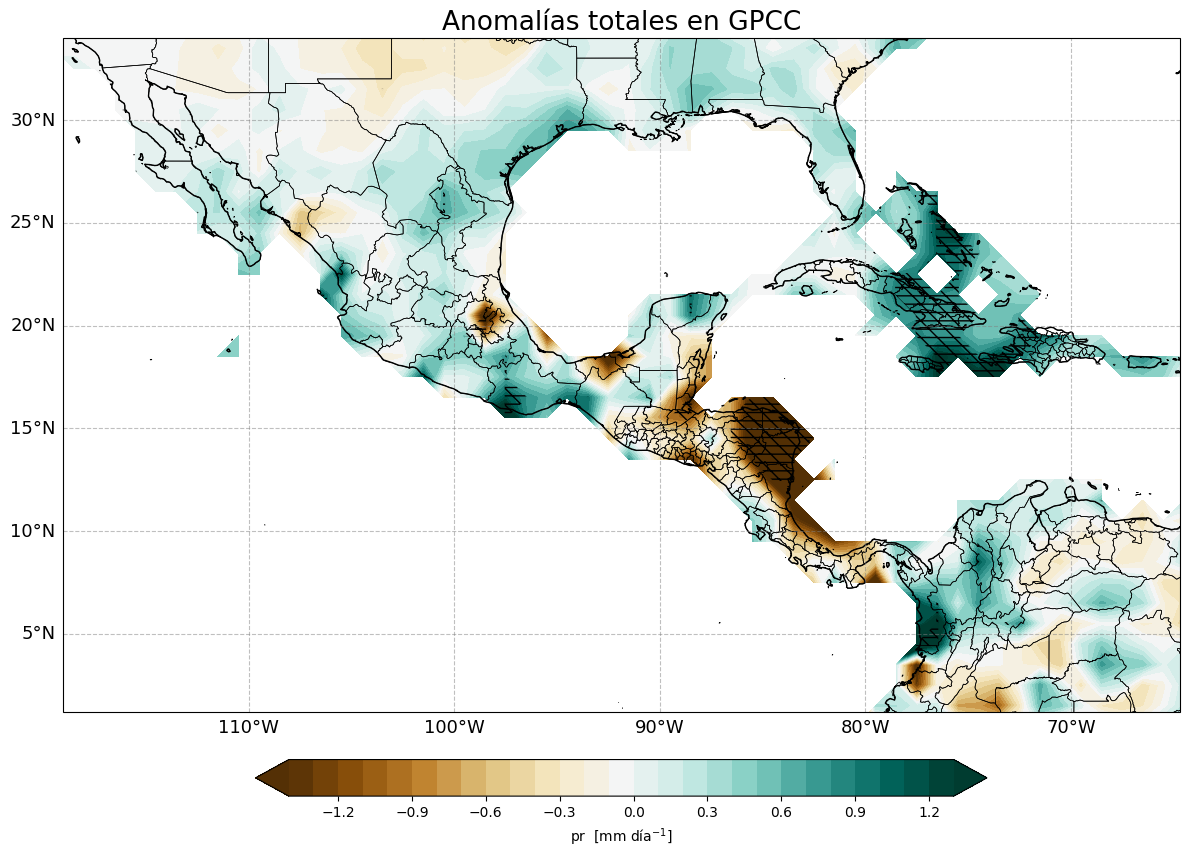

In [34]:
mapa_MC(anom_total, np.arange(-1.4, 1.4, 0.1),'BrBG','Anomalías totales en GPCC', p_values=p_values,                         
    p_levels=np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]),  
    hatches=['\-\-'],                           
    extend='both',
    lon_min=240.9375,
    lon_max=295.3125,
    lat_min=1.2,
    lat_max=34)

In [35]:
#p_values.to_netcdf('p_values_GPCC_min.nc') #antes decia actualizados

In [36]:
print(np.nanmin(anom_total), np.nanmax(anom_total))

-4.2329073 3.2503843


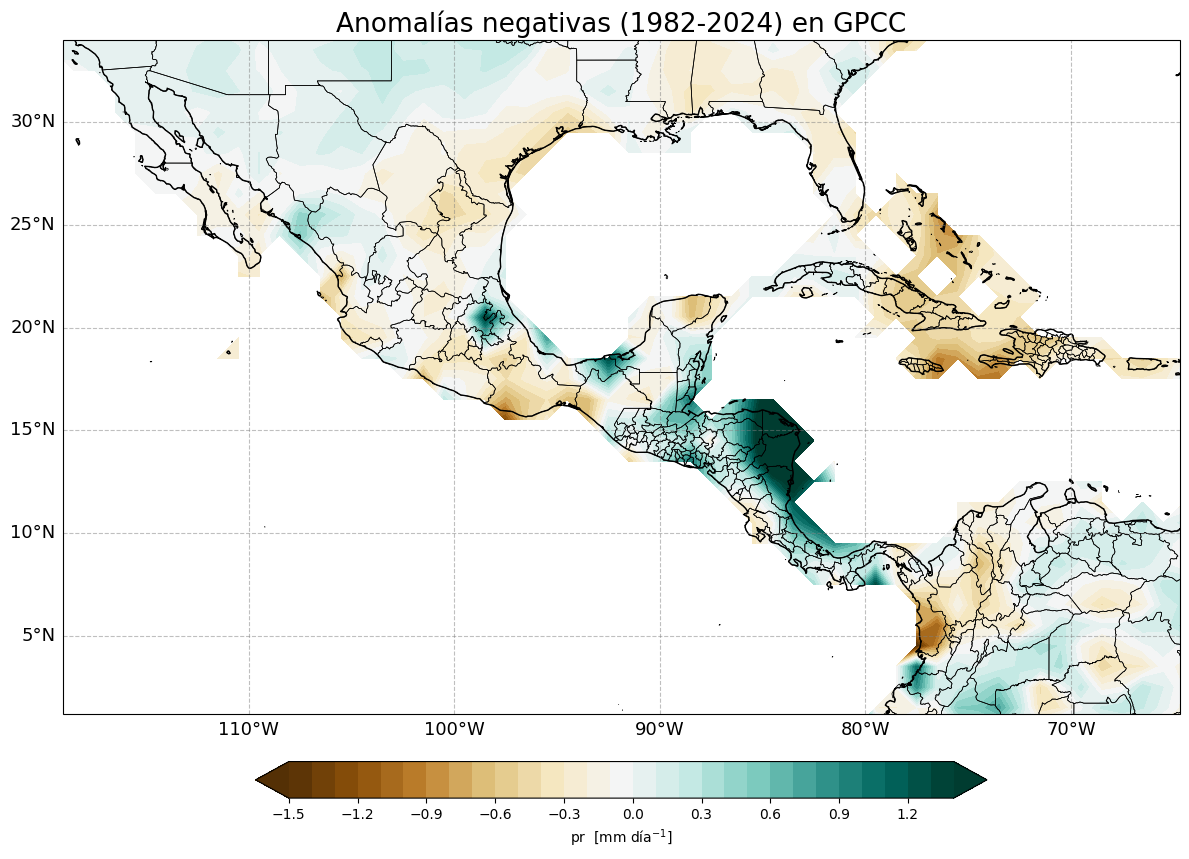

In [37]:
mapa_MC(anom_negativos, np.arange(-1.5, 1.5, 0.1), 'BrBG', 'Anomalías negativas (1982-2024) en GPCC', extend='both',
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)

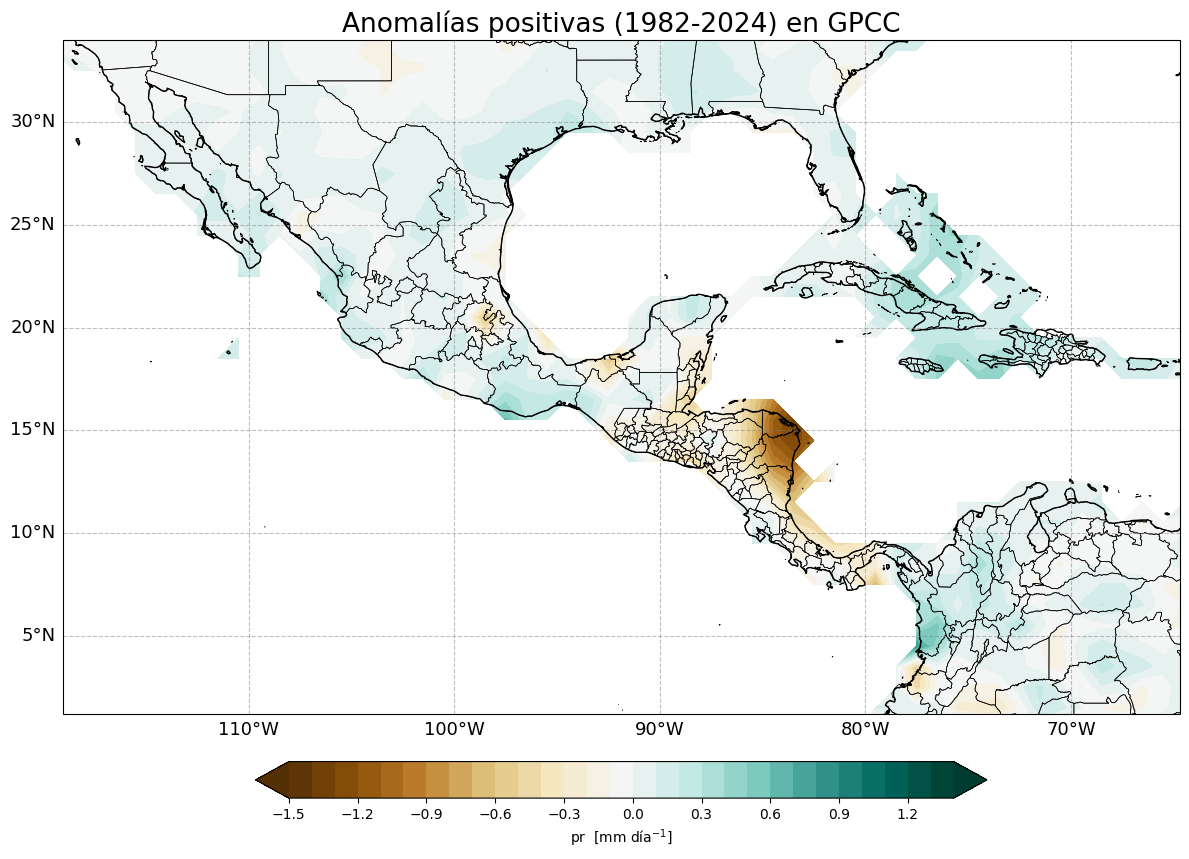

In [38]:
mapa_MC(anom_positivos, np.arange(-1.5, 1.5, 0.1), 'BrBG', 'Anomalías positivas (1982-2024) en GPCC',  extend='both', 
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)

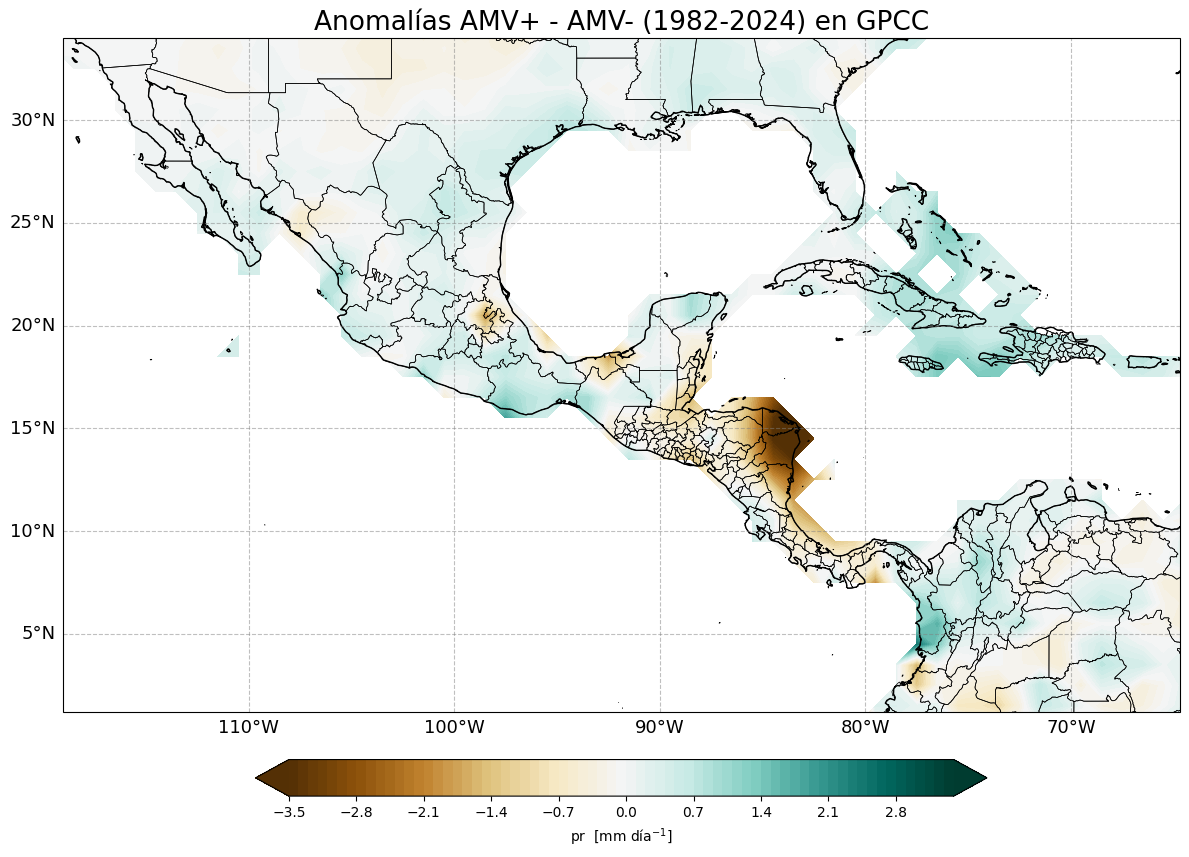

In [39]:
mapa_MC(anom_total, np.arange(-3.5, 3.5, 0.1), 'BrBG', 'Anomalías AMV+ - AMV- (1982-2024) en GPCC',  extend='both', 
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)